# Иследование продаж видео игр

В моём распоряжении данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

У меня есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Данные за 2016 год могут быть неполными.

Цель исследования:
- изучить информацию о продажах игр.
- выявить определяющие успешность игры закономерности.
- проверить гипотезы, которые помогут понять, какие игры стоит продвигать в 2017 году.
- сделать ставку на потенциально популярный продукт, чтобы спланировать рекламные кампании.

Ход исследования:

Необходимые данные получу из датасета games.csv. О состоянии и качестве данных ничего не известно, поэтому я сначала открою файл и изучу общую информацию.

Предобработаю данные:
- Если будут проблемы с наименованием столбцов, то переименую их, чтобы привести к удобным и читаемым названиям.
- Проверю на явные дубликаты и если такие имеются, то удалю.
- Проверю на наличие пропусков и обработаю их.
- Если будет необходимость, то исправлю типы данных
- Обработаю неявные дубликаты.
- Для удобного анализа в дальнейшем - добавлю необходимые столбцы.

Перейду к исследовательскому анализу данных, где опишу и визуализирую информацию о продажах игр:
- Посмотрю, сколько игр выпускалось в разные годы.
- Посмотрю, как менялись продажи по платформам.
- Возьму данные за соответствующий актуальный период.
- Изучу какие платформы лидируют по продажам, растут или падают.
- Построю график "ящик с усами" по глобальным продажам игр в разбивке по платформам.
- Посмотрю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Соотнесу выводы с продажами игр на других платформах.
- Посмотрю на общее распределение игр по жанрам.

Составлю портрет пользователя каждого региона:
- Определю для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5).
    - Самые популярные жанры (топ-5).
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

После этого проверю гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

В завершении сделаю общий вывод по исследованию.

## Открою файл с данными и изучу общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('./datasets/games.csv')

Посмотрю на первые 5 строк датафрейма и посмотрю общую информацию о данных.

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Я смог прочесть датасет, каких-то проблем при этом не возникло.

В датасете 11 столбцов и 16715 строк. В некоторых столбцах есть пропуски и неподходящие типы данных. Названия столбцов необходимо привести к нижнему регистру.

## Предобработка данных

### Переименование столбцов

Приведём названия столбцов к стандарту snake_case - в нашем случае это только нижний регистр, так как андерскоры уже есть в названиях столбцов.

In [5]:
data.columns = data.columns.str.lower()

Проверю, что названия столбцов изменились.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Исправление типов данных

Преобразую `year_of_release` в целочисленный тип.

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Посмотрю на уникальные не числовые значения в столбце user_score, так как у поля тип `object`, что странно для числового поля.

In [8]:
non_numeric_values = data['user_score'].apply(pd.to_numeric, errors='coerce').isna()
data.loc[non_numeric_values, 'user_score'].unique()

array([nan, 'tbd'], dtype=object)

Как видно из уникальных значений, в столбце есть значение 'tbd', которое означает "to be determined" - "будет определено".
Это значение означает, что у игры нет оценки пользователей, но она будет определена в будущем. Поэтому заменю это значение на пропуски.

In [9]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Изменю тип данных в user_score на числовой тип.

In [10]:
data['user_score'] = data['user_score'].astype('float')

Проверю изменения в типах данных.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


`critic_score` и `user_score` имеют разный максимальный балл - 100 и 10 соответственно.
Нужно привести их к одному максимальному баллу, чтобы было удобнее сравнивать их.

In [12]:
data['user_score'] = data['user_score'] * 10

Проверю, есть ли среди значений в столбце `user_score` и `critic_score` значения больше 100.

In [13]:
data.query('user_score > 100 or critic_score > 100').shape[0]

0

Проверю, что преобразование прошло успешно.

In [14]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Вывод по исправлению типов данных

Я заменил значение 'tbd' в столбце `user_score` на пропуски, исправил тип данных на float и привёл максимальный балл в столбце `user_score` к 100.
Также я привёл тип данных в столбце `year_of_release` к целочисленному типу.

### Обработка пропусков

Проверю на наличие явных дубликатов.

In [15]:
data.duplicated().sum()

0

Определю, сколько пропусков в каждом столбце.

In [16]:
# Создам функцию для определения пропусков, чтобы не писать одно и то же несколько раз
def missing_values(data_with_na):
    return pd.DataFrame(data_with_na.isna().mean() * 100).style.format("{:.2f}%").background_gradient('coolwarm')

In [17]:
missing_values(data)

,0
name,0.01%
platform,0.00%
year_of_release,1.61%
genre,0.01%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
critic_score,51.32%
user_score,54.59%


В столбцах name, year_of_release и genre есть небольшое количество пропусков - 0.01%, 1.61% и 0.01% соответственно.
В целом, их можно удалить ничего сильно от этого не изменится.
В critic_score, user_score, rating пропусков уже больше - 51.32%, 54.59% и 40.48% соответственно.
Удалять их уже нельзя, так как это большая часть данных. Нужно будет посмотреть на данные детально, чтобы понять, что с ними можно сделать.

Удалю пропуски в столбцах name, year_of_release и genre.

In [18]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

Заполню пропуски в critic_score медианным значением рейтинга критиков по каждой игре.

In [19]:
data['critic_score'] = data['critic_score'].fillna(data.groupby('name')['critic_score'].transform('median'))

Пропуски в user_score также заполню медианным значением рейтинга пользователей по каждой игре.

In [20]:
data['user_score'] = data['user_score'].fillna(data.groupby('name')['user_score'].transform('median'))

Посмотрю на уникальные значения в столбце rating.

In [21]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце `rating` есть значение рейтинга ESRB за разные годы, того же K-A сейчас уже нет.
Также встречается значение 'RP', которое означает "Rating Pending" - "рейтинг ожидается".
Это значение означает, что у игры нет рейтинга, но он будет определён в будущем.

Момент в том, что ESRB - система оценки игр для продажи в Северной Америке, у Европы и Японии свои системы оценки - PEGI и CERO соответственно. Логично будет проверить - продавались ли игры без рейтинга в США, прежде чем заполнять пропуски в столбце rating.

Найдём те игры, у которых нет рейтинга ESRB и они не продевались в Северной Америке.

In [22]:
without_rating_and_sales_in_na = data.query('rating.isna() and na_sales == 0')
without_rating_and_sales_in_na.shape[0]

3688

Проверим есть ли среди этих игр те, которые продавались в Европе, Японии и других странах.

In [23]:
without_rating_and_sales_in_na.query('eu_sales > 0 or jp_sales > 0 or other_sales > 0').shape[0]

3686

Как видим, у нас есть игры, которые не продавались в Северной Америке и при этом продавались в Европе, Японии и других странах.
Поэтому у данных игр и нет рейтинга ESRB. При этом у нас ещё есть 2 игры, которые не продавались нигде, поэтому у них и нет рейтинга.

Заполним пропуски в столбце rating, для игры, которые не продавались на территории NA - значением "unknown".

In [24]:
data.loc[without_rating_and_sales_in_na.index, 'rating'] = 'unknown'

Проверю, что больше пропусков в столбце rating для игр, которые не продавались на территории США - нет.

In [25]:
data.query('rating.isna() and na_sales == 0').shape[0]

0

Проверю в какие года выходили игры без рейтинга, возможно они выходили до 1994 года (года основания ESRB) и эти игры не оценивались.

In [26]:
data['year_of_release'].value_counts()

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: Int64

Какой-то зависимости в пропусках в рейтинге от года выхода игры не видно. Также вряд-ли, игры, которые вышли гораздо раньше, до сих пор ждут своего рейтинга.
Поэтому остальные пропуски в столбце `rating` также заполню значением "unknown", а не "RP".

In [27]:
data['rating'] = data['rating'].fillna('unknown')

Посмотрю на итоговое количество пропусков в датафрейме, после всех манипуляций.

In [28]:
missing_values(data)

,0
name,0.00%
platform,0.00%
year_of_release,0.00%
genre,0.00%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
critic_score,45.74%
user_score,48.16%


#### Вывод по обработке пропусков
<a name="filling-the-blanks"></a>
Удалил строки, где были пропуски в столбцах name, year_of_release и genre - 0.01%, 1.61% и 0.01% соответственно. Это небольшое количество пропусков и их удаление не повлияет на результаты анализа, но позволит избежать проблем в дальнейшем.

Доля пропусков в `critic_score` уменьшилась на \~6% и составляет 45.74%.
Пропусков в столбце `user_score` тоже стало на \~6% меньше и составляет 48.16%.
Пропусков для `critic_score` и `user_score` много.
Скорее всего это означает, что для остальных игр нет данных об оценки от пользователей или от критиков.
Больше информации сможем узнать уже при анализе данных.
Больше сделать с этими данными нечего, так как удалять их точно нельзя.

Все пропуски в столбце `rating` заполнил значением "unknown". Часть пропусков скорее всего из-за того, что игры не продавались в Северной Америке. Из-за чего не оценивались остальные игры - определить сложно. Видимо данные по возрастному рейтингу брались только из данных ESRB, поэтому остальные игры остались без рейтинга. При составлении датасета нужно было учитывать, что ESRB оценивает игры, которые продаются в Северной Америке, а не во всём мире, для той же Европы есть PEGI, а для Японии CERO.

Скорее всего, если опираться на то, что в столбце `rating` есть данные только про Северную Америку, то возможно пропуски в оценках от пользователей и от критиков связаны с тем, что данные брались только с какой-нибудь североамериканской площадки. Поэтому у нас такое большое количество пропусков в столбцах `user_score` и `critic_score`.


### Поверим на наличие неявных дубликатов

Проверю есть ли дубликаты в рамках `name`, `platform` и `year_of_release`.

In [29]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Такой дубликат всего один, посмотрю на него.

In [30]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,55.0,E


Продаж у этой игры почти нет, поэтому проще её удалить.

In [31]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

Посмотрю на уникальные значения в столбце `platform`.

In [32]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В `platform` неявных дубликатов нет.

Посмотрю на уникальные значения в столбце `genre`.

In [33]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

В `genre` тоже неявных дубликатов нет.

Приведу `name` к нижнему регистру и проверю есть ли дубликаты в рамках `name`, `platform` и `year_of_release`.

In [34]:
data_copy = data.copy()
data_copy['name'] = data_copy['name'].str.lower()
data_copy.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

Посмотрим сколько уникальных названий игры в датафрейме.

In [35]:
data_copy['name'].nunique()

11426

Уникальных названий 11426 строк, искать среди них что-то вручную глазами - не вариант.

#### Вывод по неявным дубликатам

Дубликат был обнаружен только один, из-за того, что данные по продажам у этой игры были почти нулевые, я его удалил.

### Добавление необходимых столбцов

Добавлю столбец с суммарными продажами по всем регионам.

In [36]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посмотрю на итоговый датафрейм.

In [37]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Вывод по предобработке данных

Была проведена следующая работа по предобработке данных:
- Я привёл названия столбцов к стандарту snake_case
- Преобразовал тип данных в столбце `year_of_release` к целочисленному типу, заменил значение 'tbd' в столбце `user_score` на пропуски, исправил тип данных в `user_score` на числовой тип, привёл максимальный балл в столбце `user_score` к 100.
- Заполнил пропуски в `critic_score` и `user_score` медианным значением рейтинга критиков и пользователей по каждой игре, заполнил пропуски в столбце `rating` значением "unknown".
- Удалил явный дубликат
- Добавил столбец с суммарными продажами по всем регионам.

Подробнее про *обработку пропусков* можно прочитать в соответствующем [выводе](#filling-the-blanks)
По остальным пунктам вся необходимая информация есть в этом выводе.

## Исследовательский анализ данных

### Определение актуального периода

Для дальнейшей работы мне нужно определить актуальный период, на который я буду ориентироваться.

#### Сколько игр выпускалось в разные годы

Посмотрим сколько игр выпускалось в разные годы.

In [38]:
games_per_year = data['year_of_release'].value_counts()
games_per_year

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: Int64

Построю график для наглядности.

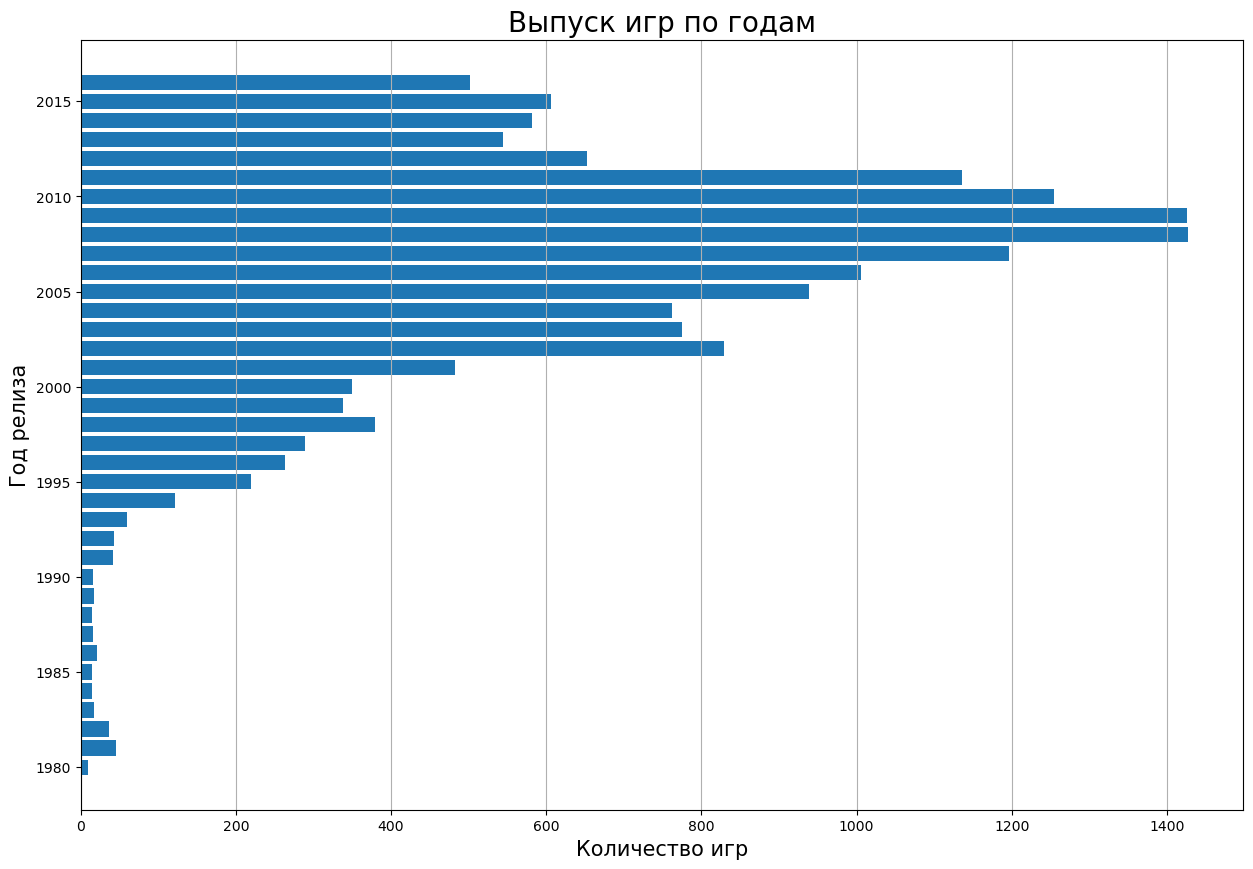

In [39]:
# Отсортирую значения по годам
games_per_year = games_per_year.sort_index()

plt.figure(figsize=(15, 10))
plt.barh(games_per_year.index, games_per_year.values)

plt.title('Выпуск игр по годам', fontsize=20)
plt.xlabel('Количество игр', fontsize=15)
plt.ylabel('Год релиза', fontsize=15)
plt.grid(axis='x')
plt.show()

Видно, что большинство игр приходится от 1995 года. Пик приходится на 2008-2009 года, после чего количество игр начало падать.

Посмотрим какой процент игр был продан до 1995 года.

In [40]:
proportion = games_per_year.loc[games_per_year.index < 1995].sum() / games_per_year.sum()
print(f'Процент игр, которые были выпущены до 1995 года: {proportion:.2%}')

Процент игр, которые были выпущены до 1995 года: 2.96%


Данные до 1995 года не так важны, так как их доля составляет всего 2.96%.

#### Как менялись продажи по платформам

Построю график, чтобы посмотреть как менялись продажи по платформам, начиная с 1995 года.

Все платформы сгруппирую по годам и посчитаю суммарные продажи по каждой платформе.
Для упрощения анализа возьму только топ-10 платформ, иначе график будет слишком загружен и на нём будет сложно что-то разглядеть.

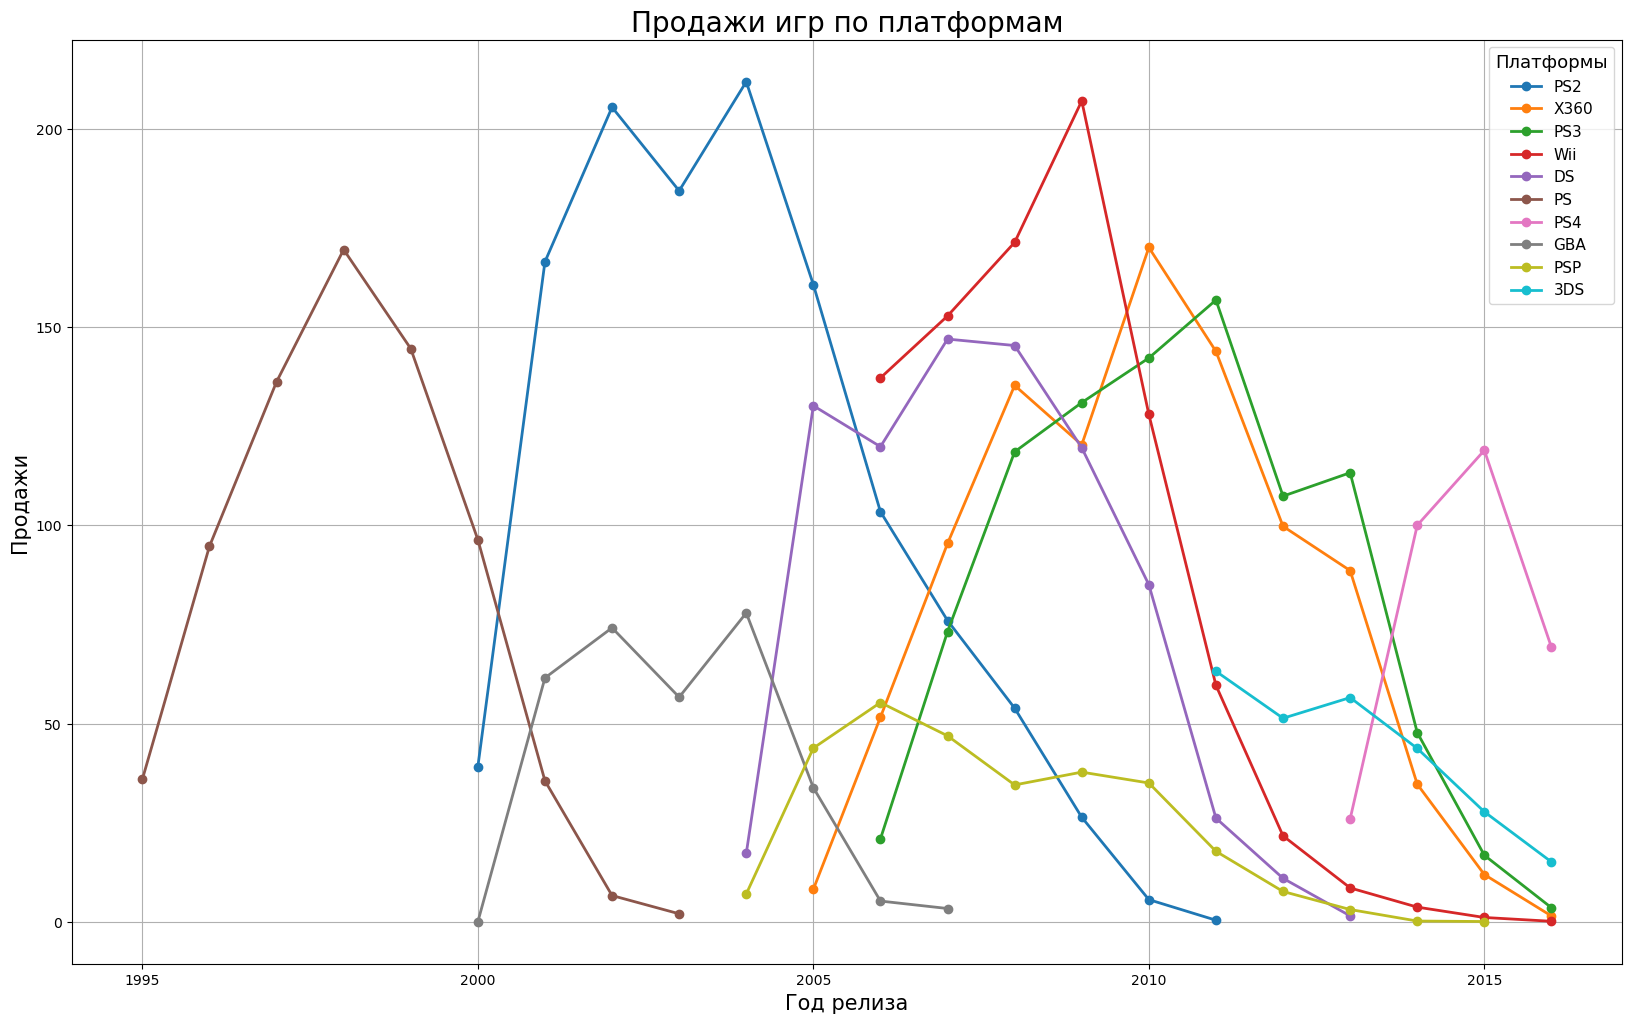

In [41]:
data_after_1995 = data.query('year_of_release >= 1995', engine='python')
top_platforms = data_after_1995.groupby('platform')['total_sales'].sum().nlargest(10).index
platforms_sales = data_after_1995.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

filtered_sales = platforms_sales[top_platforms]

plt.figure(figsize=(20, 12))
colors = plt.cm.tab10(np.linspace(0, 1, len(top_platforms)))
for platform, color in zip(top_platforms, colors):
    plt.plot(filtered_sales.index, filtered_sales[platform], label=platform, color=color, linewidth=2, marker='o')

plt.title('Продажи игр по платформам', fontsize=20)
plt.xlabel('Год релиза', fontsize=15)
plt.ylabel('Продажи', fontsize=15)
plt.grid(True)
plt.legend(title='Платформы', title_fontsize='13', fontsize='11')
plt.show()

Из графика видно, что среднее время жизни платформы примерно 7-10 лет. Пик продаж приходится на 3-4 года после релиза платформы, после чего продажи начинают падать.
Проверим среднее время жизни платформы расчётом, чтобы сказать цифру поточнее.

Посчитаем это следующем образом: возьмём годы первого и последнего релиза игр для каждой платформы за все годы и посчитаем разницу между ними.
Затем посчитаем среднее значение этой разницы.

In [42]:
platforms_lifespan = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
platforms_lifespan['lifespan'] = platforms_lifespan['max'] - platforms_lifespan['min']
platforms_lifespan['lifespan'].mean()

7.612903225806452

Среднее время жизни по всем платформам, примерно 7.5 лет, так что мои предположения подтвердились.

#### Вывод по определению актуального периода
<a name="determination-of-the-relevant-period"></a>

Исходя из анализа данных выпуска игр по годам и как менялись продажи по платформам, я определил актуальный период с 2005 по 2015 года включительно.

Я пришёл к такому выводу по следующим причинам:
- Примерно 97% игр выпущено после 1995 года, поэтому данные до 1995 года мы отметаем на этом этапе.
- Также бурный рост продаж начинается с 2005 года.
- Затем мы смотрим на выпуск игр под конкретные платформы и видим, что актуальный период начался где-то как раз в 2005 году. В этот год начали появляться новые платформы, которые через пару лет станут лидерами продаж.
- Также это как раз период в 10 лет - верхняя граница среднего времени жизни платформы, если смотреть на график. 
- 2016 год я исключил, потому что данные за 2016 год могут быть неполными, как указано в описании задачи. Особенно, если там нет ещё данных за декабрь, то это сильно может поменять картину, так как в месяц перед праздниками обычно происходит большая часть продаж.

Выделим актуальный период в отдельный датафрейм.

In [43]:
actual_data = data.query('2005 <= year_of_release <= 2015', engine='python')

Посмотрим на первые 5 строк нового датафрейма и на общую информацию о нём.

In [44]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91


In [45]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10769 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10769 non-null  object 
 1   platform         10769 non-null  object 
 2   year_of_release  10769 non-null  Int64  
 3   genre            10769 non-null  object 
 4   na_sales         10769 non-null  float64
 5   eu_sales         10769 non-null  float64
 6   jp_sales         10769 non-null  float64
 7   other_sales      10769 non-null  float64
 8   critic_score     6120 non-null   float64
 9   user_score       5980 non-null   float64
 10  rating           10769 non-null  object 
 11  total_sales      10769 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.1+ MB


### Лидеры продаж среди платформ

Посмотрим на общие продажи по платформам за актуальный период.

In [46]:
platforms_total_sales = actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms_total_sales

platform
X360    959.72
PS3     927.73
Wii     891.00
DS      785.49
PS2     426.46
PSP     282.47
PS4     244.89
3DS     242.67
PC      162.54
XOne    133.17
WiiU     77.59
XB       59.85
PSV      49.56
GBA      42.54
GC       39.15
DC        0.06
Name: total_sales, dtype: float64

Видно, что лидерами по продажам являются платформы X360, PS3, Wii, DS, PS2, PS4, PSP, 3DS, PC и XOne.

Построю график для наглядности.

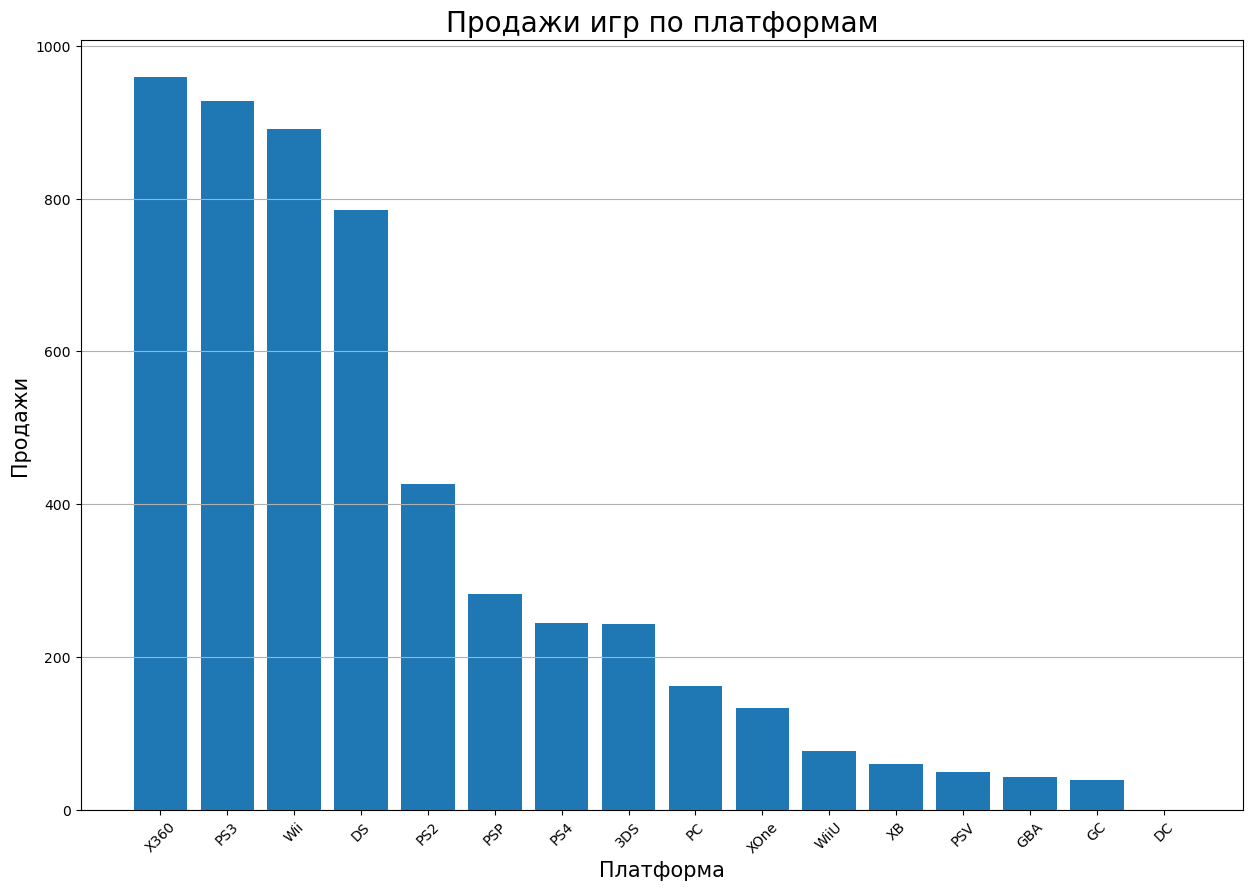

In [47]:
plt.figure(figsize=(15, 10))
plt.bar(platforms_total_sales.index, platforms_total_sales.values)

plt.title('Продажи игр по платформам', fontsize=20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Продажи', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Посмотрим на динамику продаж по этим платформам.

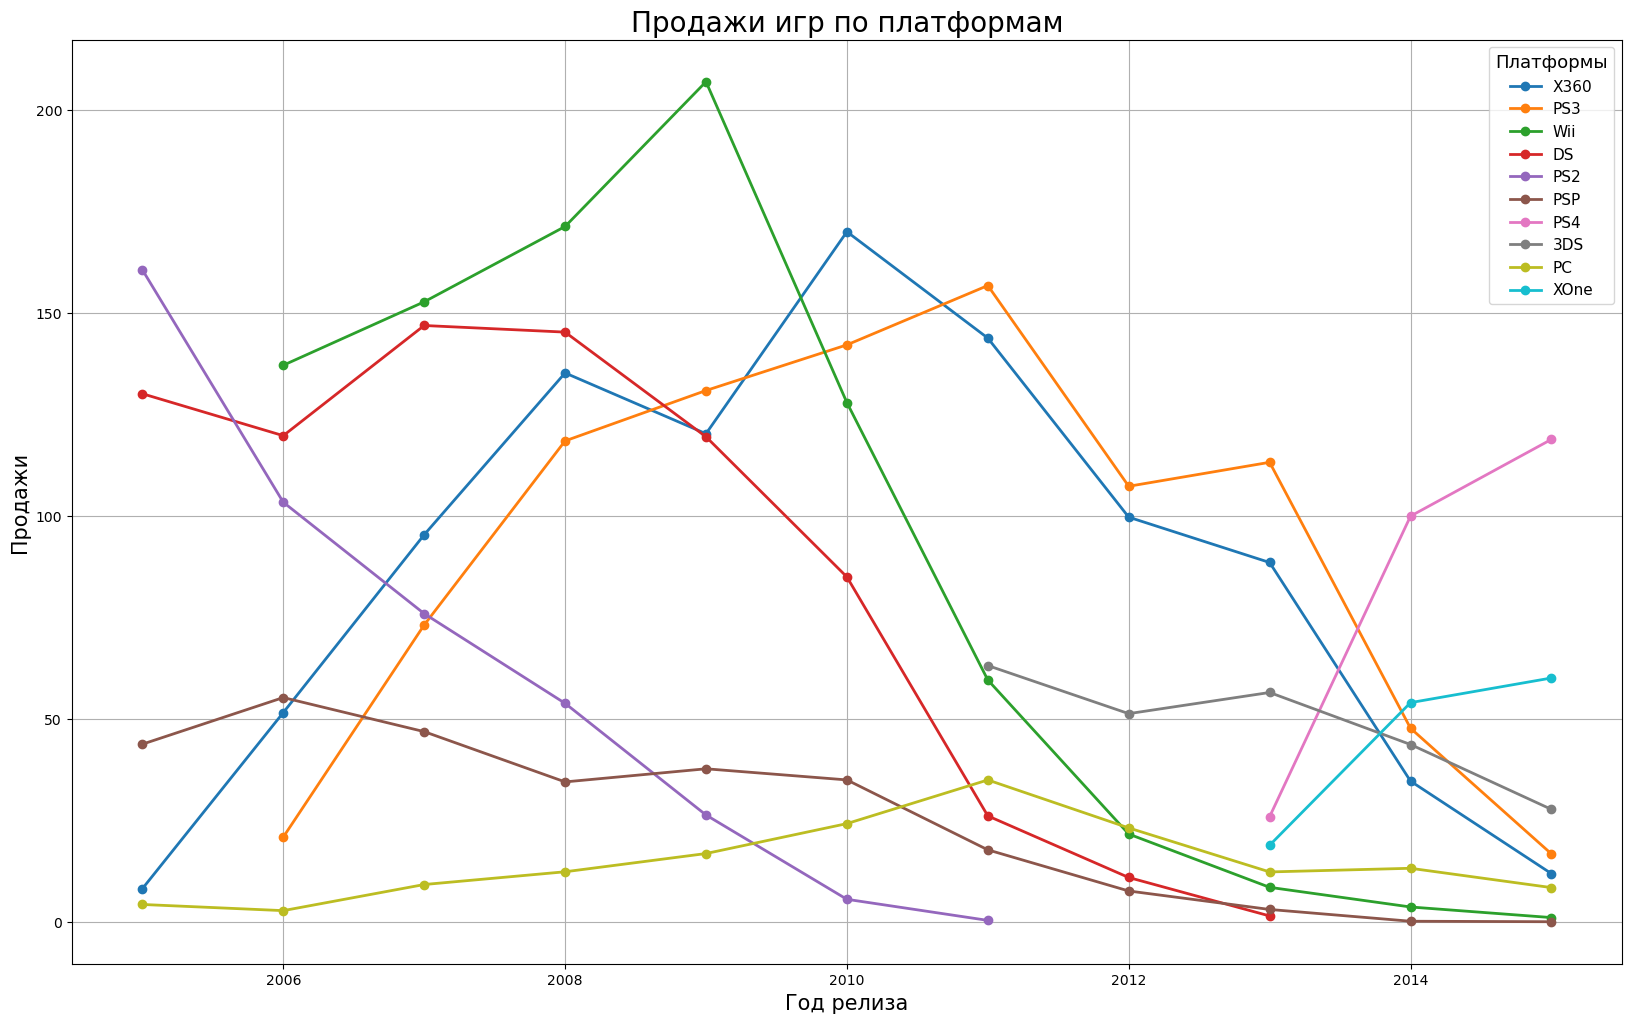

In [48]:
top_platforms = platforms_total_sales.head(10).index
platforms_sales = actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

filtered_sales = platforms_sales[top_platforms]

plt.figure(figsize=(20, 12))
colors = plt.cm.tab10(np.linspace(0, 1, len(top_platforms)))
for platform, color in zip(top_platforms, colors):
    plt.plot(filtered_sales.index, filtered_sales[platform], label=platform, color=color, linewidth=2, marker='o')

plt.title('Продажи игр по платформам', fontsize=20)
plt.xlabel('Год релиза', fontsize=15)
plt.ylabel('Продажи', fontsize=15)
plt.grid(True)
plt.legend(title='Платформы', title_fontsize='13', fontsize='11')
plt.show()

#### Вывод по лидерам продаж среди платформ
<a name="leaders-in-sales-among-platforms"></a>
Из графика видно:
- Почти все платформы уже находятся на сильном спаде.
- Исключение составляют PS4 и XOne, которые находятся на подъёме, начиная с 2013 года - года их релиза.
- Так в 2015 году продажи игр на этих платформах сильно превышают продажи на других.
- При этом продажи на PS4 значительно превышают продажи на XOne.
- Нельзя не упомянуть отдельно PC, продажи у этой платформы не сильно падают, так как они всегда были на одном уровне, но и роста тоже нет.

Потенциально прибыльными платформами являются PS4 и XOne.
При этом не стоит убирать со счетов PC, так как продажи тут всегда были на одном уровне, то есть, в целом, это довольно стабильная платформа, где можно ожидать стабильных продаж.

### Оценка выбросов по глобальным продажам в разбивке по платформам

Построю "ящик с усами" по глобальным продажам игр в разбивке в отдельности для каждой платформам.

<Figure size 2000x1200 with 0 Axes>

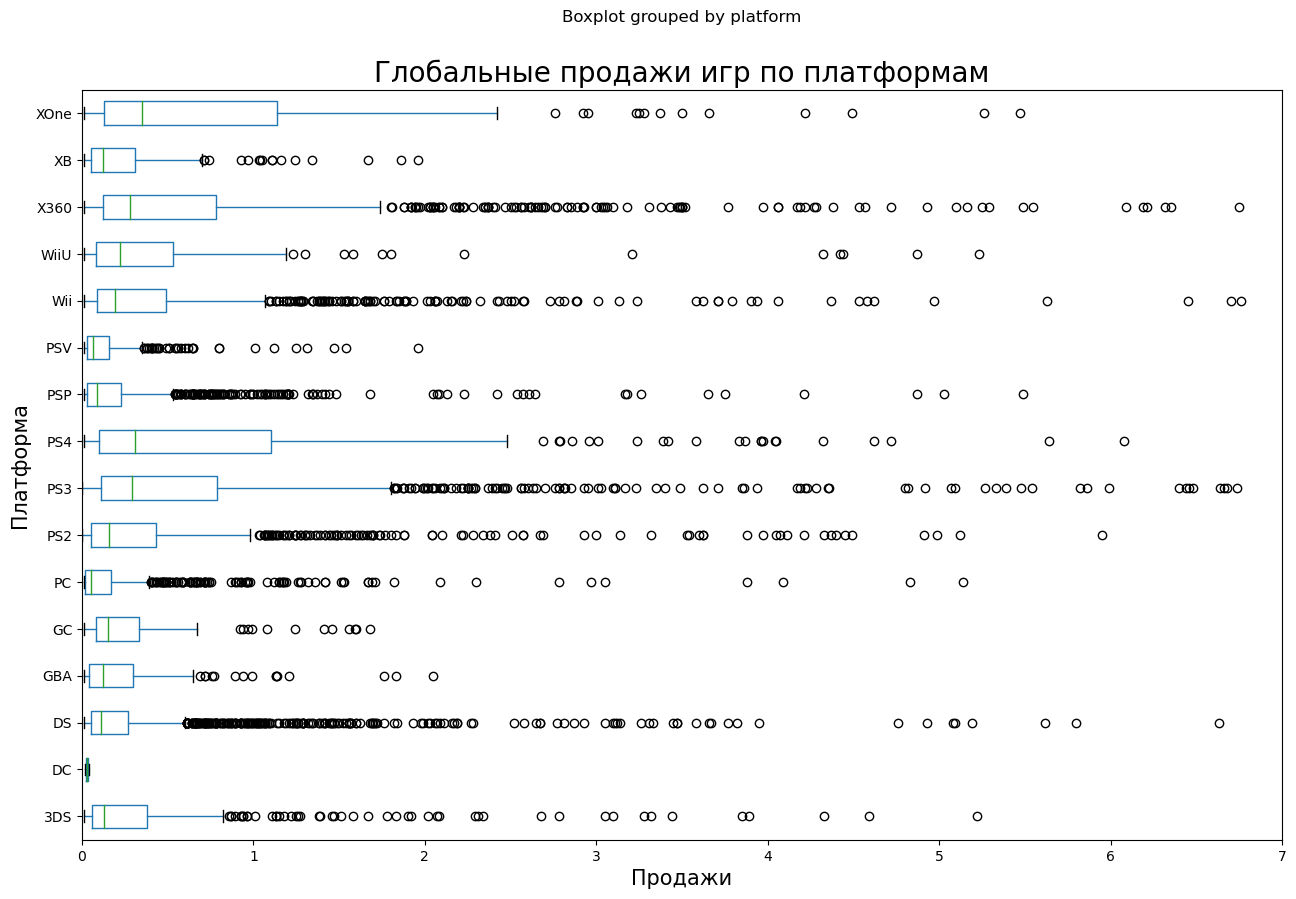

In [49]:
plt.figure(figsize=(20, 12))
actual_data.boxplot(column='total_sales', by='platform', vert=False, figsize=(15, 10))

plt.title('Глобальные продажи игр по платформам', fontsize=20)
plt.xlabel('Продажи', fontsize=15)
plt.ylabel('Платформа', fontsize=15)
plt.grid()
plt.xlim(0, 7)
plt.show()

#### Вывод по оценке выбросов по глобальным продажам в разбивке по платформам
<a name="assessment-of-outliers-in-global-sales-broken-down-by-platform"></a>
Из графика видно, что у каждой платформы есть выбросы, которые сильно выходят за пределы "усов" ящика.
Скорее всего это означает, что у каждой платформы есть игры, которые продаются гораздо лучше, чем остальные.

### Влияние отзывов на продажи

Посмотрю на влияние отзывов пользователей и критиков на продажи игр на платформе PS3, как на одной из самых популярных платформ в актуальный период.

Для этого построю диаграмму рассеяния и посчитаю корреляцию между отзывами и продажами.

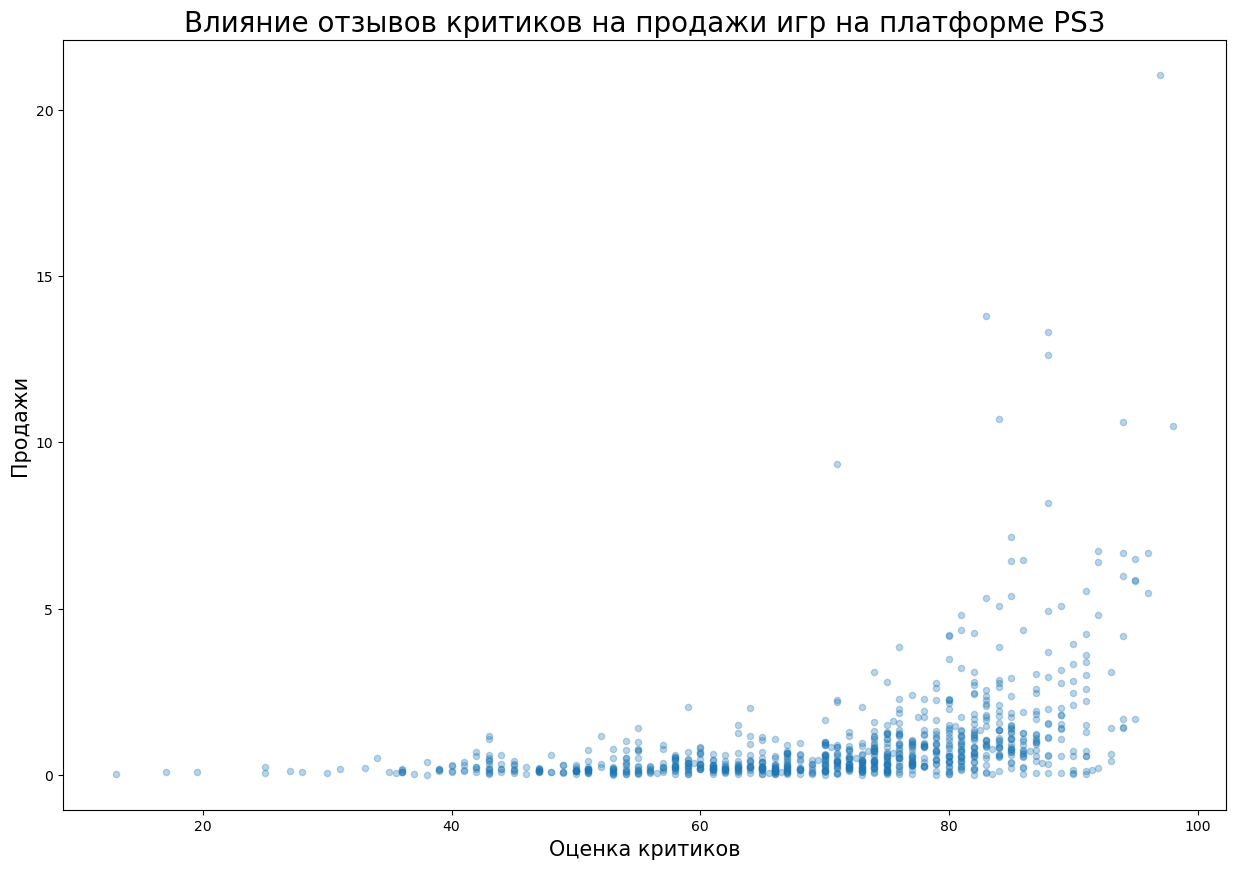

In [50]:
ps3_data = actual_data.query('platform == "PS3"')
ps3_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(15, 10))

plt.title('Влияние отзывов критиков на продажи игр на платформе PS3', fontsize=20)
plt.xlabel('Оценка критиков', fontsize=15)
plt.ylabel('Продажи', fontsize=15)
plt.show()

In [51]:
ps3_data['critic_score'].corr(ps3_data['total_sales'])

0.4119543553392631

Как видно из графика и расчётов, есть слабая положительная корреляция (0.41) между оценкой критиков и продажами игр на платформе PS3.

Посмотрю на влияние отзывов пользователей на продажи игр на платформе PS3.

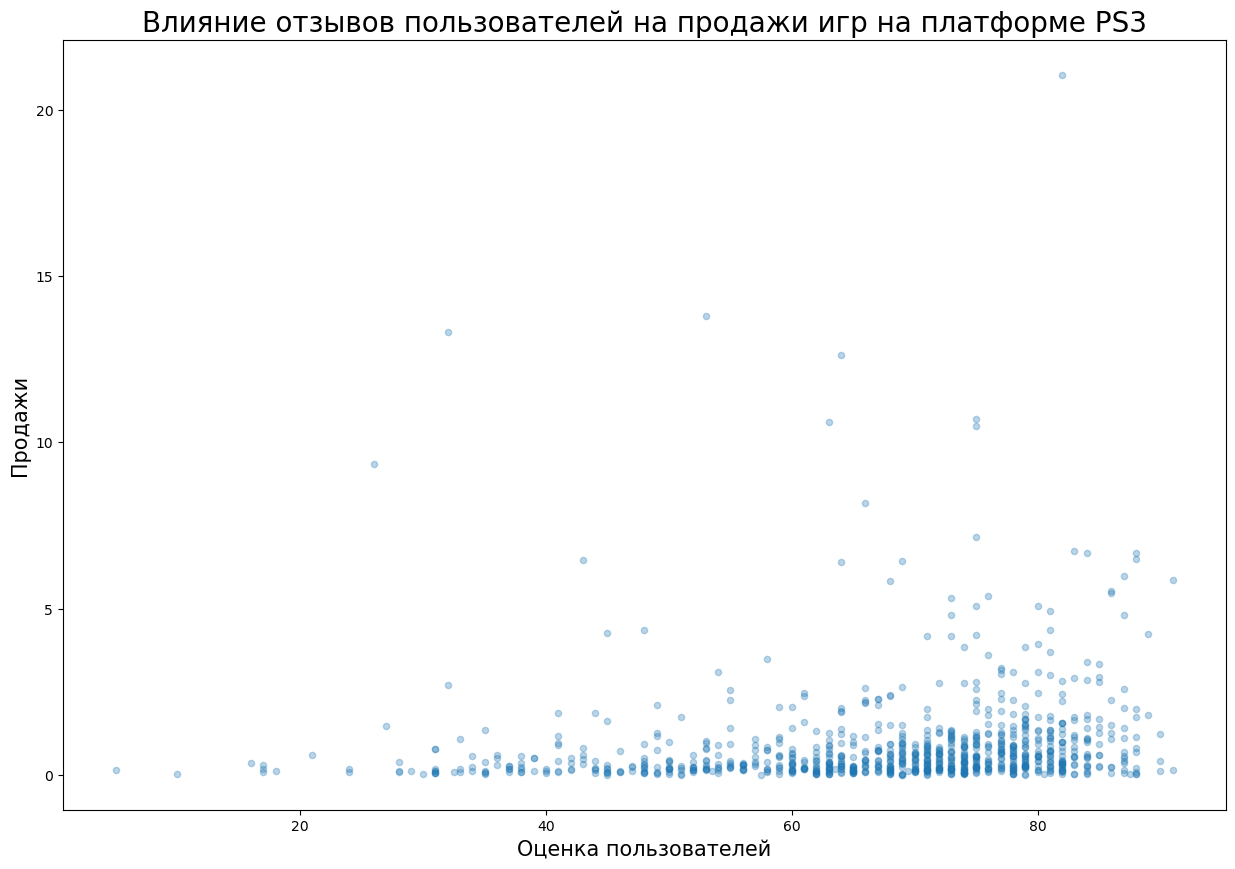

In [52]:
ps3_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(15, 10))

plt.title('Влияние отзывов пользователей на продажи игр на платформе PS3', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Продажи', fontsize=15)
plt.show()

In [53]:
ps3_data['user_score'].corr(ps3_data['total_sales'])

0.1250746793339839

Тут уже очень слабая положительная корреляция (0.13) между оценкой пользователей и продажами игр на платформе PS3.

Посмотрим на влияние отзывов критиков и пользователей на продажи игр на платформах PS4 и XOne, как потенциально прибыльных платформах.
Тут я думаю, что хватит только расчёта корреляции, так как графики будут выглядеть примерно также, как и на платформе PS3.

In [54]:
ps4_data = actual_data.query('platform == "PS4"')
xone_data = actual_data.query('platform == "XOne"')

print(f'''
Корреляция между оценкой критиков и продажами игр на платформе PS4: {ps4_data['critic_score'].corr(ps4_data['total_sales']):.2f}
Корреляция между оценкой пользователей и продажами игр на платформе PS4: {ps4_data['user_score'].corr(ps4_data['total_sales']):.2f}

Корреляция между оценкой критиков и продажами игр на платформе XOne: {xone_data['critic_score'].corr(xone_data['total_sales']):.2f}
Корреляция между оценкой пользователей и продажами игр на платформе XOne: {xone_data['user_score'].corr(xone_data['total_sales']):.2f}
''')


Корреляция между оценкой критиков и продажами игр на платформе PS4: 0.40
Корреляция между оценкой пользователей и продажами игр на платформе PS4: 0.02

Корреляция между оценкой критиков и продажами игр на платформе XOne: 0.39
Корреляция между оценкой пользователей и продажами игр на платформе XOne: -0.07


#### Вывод по влиянию отзывов на продажи
<a name="influence-of-reviews-on-sales"></a>
Если смотреть на платформу PS3, то из графиков и расчётов видно:
- Что корреляция между оценкой критиков и продажами слабая, но всё же есть.
- В то время как корреляция между оценкой пользователей и продажами очень слабая.

У потенциально прибыльных платформ (PS4 и XOne) корреляция между оценкой критиков и продажами примерно такая же, как и на PS3.
В то время как корреляция между оценкой пользователей и продажами игр на этих платформах гораздо ниже, у X0ne она вообще отрицательная.

Из этого можно сделать вывод, что оценка критиков влияет на продажи игр больше, чем оценка пользователей.
При этом стоит учитывать, что и само влияние критиков на продажи довольно слабое.

### Распределение игр по жанрам

Посмотрю на распределение игр по жанрам.

In [55]:
genre_sales = actual_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          1171.93
Sports           829.84
Shooter          720.34
Misc             613.23
Role-Playing     532.60
Racing           352.24
Platform         299.83
Simulation       267.73
Fighting         203.60
Adventure        145.99
Puzzle           110.27
Strategy          77.29
Name: total_sales, dtype: float64

Построю график для наглядности.

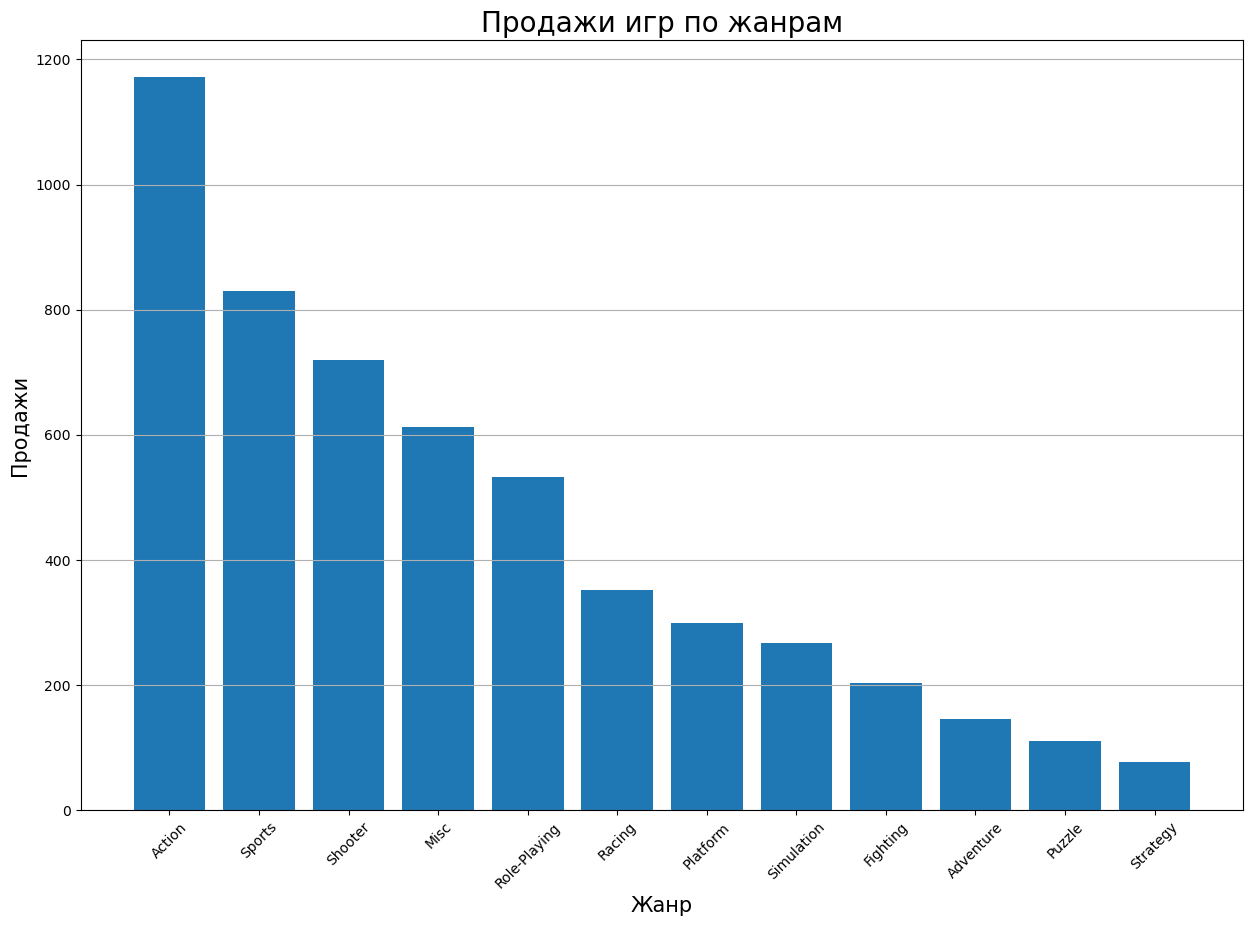

In [56]:
plt.figure(figsize=(15, 10))
plt.bar(genre_sales.index, genre_sales.values)

plt.title('Продажи игр по жанрам', fontsize=20)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Продажи', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Вывод по распределению игр по жанрам
<a name="distribution-of-games-by-genre"></a>
Из графика видно, что больше всего продаж приходится на жанры Action, Sports и Shooter.
Самые низкие продажи у жанров Adventure, Puzzle и Strategy.

Отдельно выделяется жанр Action, так как продажи у него в \~1.5 раза больше, чем у второго по продажам жанра - Sports.
Самые низкие продажи у жанра Strategy, у него продажи в \~1.5 раза меньше, чем у предпоследнего жанра - Puzzle.

Из этого, можно сделать вывод, что нужно ориентироваться на жанры Action, Sports и Shooter, так как они приносят больше всего денег.

### Вывод по исследовательскому анализу данных

В ходе исследовательского анализа данных было выявлено:
- Больше всего игр выпускалось в 2008-2009 годах, после чего количество игр начало падать.
- Среднее время жизни платформы примерно 7.5 лет.
- Пик продаж приходится на 3-4 года после релиза платформы.
- Актуальный период для анализа данных - с 2005 по 2015 года включительно.
- Потенциально прибыльными платформами являются PS4 и XOne.
- Оценка критиков влияет на продажи игр больше, чем оценка пользователей. При этом само влияние критиков на продажи довольно слабое.
- Нужно ориентироваться на жанры Action, Sports и Shooter, так как они приносят больше всего денег.
- По всей видимости, у каждой платформы есть игры, которые продаются гораздо лучше, чем остальные.

На основе этого анализа можно сделать вывод, что для планирования рекламных кампаний на 2017 год стоит ориентироваться на игры для платформ PS4 и XOne, жанры Action, Sports и Shooter, неплохо будет ориентироваться на высокие оценки критиков, но последнее - не решающий фактор.

Подробнее про каждый пункт можно прочитать в соответствующем выводе:
- [Определение актуального периода](#determination-of-the-relevant-period)
- [Лидеры продаж среди платформ](#leaders-in-sales-among-platforms)
- [Оценка выбросов по глобальным продажам в разбивке по платформам](#assessment-of-outliers-in-global-sales-broken-down-by-platform)
- [Влияние отзывов на продажи](#influence-of-reviews-on-sales)
- [Распределение игр по жанрам](#distribution-of-games-by-genre)

## Портрет пользователя каждого региона

Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Инструкция по выполнению проекта

Шаг 1. Откройте файл с данными и изучите общую информацию
путь к файлу: /datasets/games.csv

Шаг 2. Подготовьте данные.
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных.
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона.
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы.
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Шаг 6. Напишите общий вывод.
Оформление: Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

Описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы долларов)
EU_sales — продажи в Европе (миллионы долларов)
JP_sales — продажи в Японии (миллионы долларов)
Other_sales — продажи в других странах (миллионы долларов)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категори, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Данные за 2016 год могут быть неполными.